Problem No. 3: Classification of Iris species using various Models and trying to implement Logistic Regression from scratch.

Iris is a very popular and one of the most studied datasets.

Step 1: Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2: Importing the dataset

In [2]:
dataset = pd.read_csv('Iris.csv')
dataset.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

Step 3: Analysing The Dataset.

Step 3a: Check the data shape.

In [3]:
dataset.shape

(150, 6)

Step 3b: Check the data description

In [4]:
dataset.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

Step 3c: Checking if it contains any null values

In [5]:
dataset.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

Check The Dataset Columns and Return the Categories of Species

In [6]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
dataset.iloc[:, -1]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [8]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Shuffling the dataset

In [9]:
dst = dataset.sample(frac = 1)
print(dst)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15    16            5.7           4.4            1.5           0.4   
75    76            6.6           3.0            4.4           1.4   
91    92            6.1           3.0            4.6           1.4   
105  106            7.6           3.0            6.6           2.1   
78    79            6.0           2.9            4.5           1.5   
..   ...            ...           ...            ...           ...   
116  117            6.5           3.0            5.5           1.8   
128  129            6.4           2.8            5.6           2.1   
89    90            5.5           2.5            4.0           1.3   
119  120            6.0           2.2            5.0           1.5   
107  108            7.3           2.9            6.3           1.8   

             Species  
15       Iris-setosa  
75   Iris-versicolor  
91   Iris-versicolor  
105   Iris-virginica  
78   Iris-versicolor  
..               ... 

In [10]:
dst.set_index('Id')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
16,5.7,4.4,1.5,0.4,Iris-setosa
76,6.6,3.0,4.4,1.4,Iris-versicolor
92,6.1,3.0,4.6,1.4,Iris-versicolor
106,7.6,3.0,6.6,2.1,Iris-virginica
79,6.0,2.9,4.5,1.5,Iris-versicolor
...,...,...,...,...,...
117,6.5,3.0,5.5,1.8,Iris-virginica
129,6.4,2.8,5.6,2.1,Iris-virginica
90,5.5,2.5,4.0,1.3,Iris-versicolor


Step 4: Separating The data in Test Data and Train Data for various Ratio Values.

The main intention of this notebook is to compare performances of training models working on different ratio of dataset.

In [11]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

Step 5: Divide Dataset for Following Rations in array.

Set The Ratio at given specidied values.

I have implemented them in a very long manner and output so Apologies in advance..

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

rt = [0.20,0.25,0.30,0.40,0.50]
for i in range(5):
  print()
  print("The Given Ratio is: {}".format(rt[i]))
  print()
  print()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = rt[i], random_state = 1)
  # Add a feature Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  #Logistic Regression Model
  classifierlog = LogisticRegression(random_state = 0)
  classifierlog.fit(X_train, y_train)
  y_pred_log = classifierlog.predict(X_test)
  cm = confusion_matrix(y_test, y_pred_log)
  print(cm)
  print("The accuracy score for Logistic Regression at data split ratio {} is: ".format(rt[i]))
  print(accuracy_score(y_test, y_pred_log))
  print()

  #Knn Regression Model
  classifierknn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
  classifierknn.fit(X_train, y_train)
  y_pred_knn = classifierknn.predict(X_test)
  cm = confusion_matrix(y_test, y_pred_knn)
  print(cm)
  print("The accuracy score for 10-NN at data split ratio {} is: ".format(rt[i]))
  print(accuracy_score(y_test, y_pred_knn))
  print()

  #SVM Linear Model
  classifiersvm = SVC(kernel = 'linear', random_state = 0)
  classifiersvm.fit(X_train, y_train)
  y_pred_svm = classifiersvm.predict(X_test)
  cm = confusion_matrix(y_test, y_pred_svm)
  print(cm)
  print("The accuracy score for Linear SVM at data split ratio {} is: ".format(rt[i]))
  print(accuracy_score(y_test, y_pred_svm))
  print()

  #Kernel SVM Model
  classifierksvm = SVC(kernel = 'rbf', random_state = 0)
  classifierksvm.fit(X_train, y_train)
  y_pred_ksvm = classifierksvm.predict(X_test)
  cm = confusion_matrix(y_test, y_pred_ksvm)
  print(cm)
  print("The accuracy score for Kernel SVM at data split ratio {} is: ".format(rt[i]))
  print(accuracy_score(y_test, y_pred_ksvm))
  print()


  #Naive Bayes Model
  classifiernaive = GaussianNB()
  classifiernaive.fit(X_train, y_train)
  y_pred_naive = classifiernaive.predict(X_test)
  cm = confusion_matrix(y_test, y_pred_naive)
  print(cm)
  print("The accuracy score for Naive Bayes at data split ratio {} is: ".format(rt[i]))
  print(accuracy_score(y_test, y_pred_naive))
  print()

  #Decision Tree Classifier
  classifierdtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  classifierdtc.fit(sc.inverse_transform(X_train), y_train)
  y_pred_dtc = classifierdtc.predict(sc.inverse_transform(X_test))
  cm = confusion_matrix(y_test, y_pred_dtc)
  print(cm)
  print("The accuracy score for Decision Tree at data split ratio {} is: ".format(rt[i]))
  print(accuracy_score(y_test, y_pred_dtc))
  print()

  #Random Forest Classifier
  classifierRF = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
  classifierRF.fit(X_train, y_train)
  y_pred_rf = classifierRF.predict(X_test)
  cm = confusion_matrix(y_test, y_pred_rf)
  print(cm)
  print("The accuracy score for Random Forest Classifier at data split ratio {} is: ".format(rt[i]))
  print(accuracy_score(y_test, y_pred_rf))
  maxi1 = max(accuracy_score(y_test, y_pred_log),accuracy_score(y_test, y_pred_knn),accuracy_score(y_test, y_pred_svm))
  maxi2 = max(accuracy_score(y_test, y_pred_rf),accuracy_score(y_test, y_pred_dtc),accuracy_score(y_test, y_pred_naive),accuracy_score(y_test, y_pred_ksvm))
  maxi = max(maxi1,maxi2)
  print()
  print("The most optimum accuracy score in the given Classifiers for this split ratio is: {}".format(maxi))
  print()


The Given Ratio is: 0.2


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
The accuracy score for Logistic Regression at data split ratio 0.2 is: 
1.0

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
The accuracy score for 10-NN at data split ratio 0.2 is: 
1.0

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
The accuracy score for Linear SVM at data split ratio 0.2 is: 
1.0

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
The accuracy score for Kernel SVM at data split ratio 0.2 is: 
1.0

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
The accuracy score for Naive Bayes at data split ratio 0.2 is: 
1.0

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
The accuracy score for Decision Tree at data split ratio 0.2 is: 
0.9666666666666667

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
The accuracy score for Random Forest Classifier at data split ratio 0.2 is: 
1.0

The most optimum accuracy score in the given Classifiers for this split ratio is: 1.0


The Given Ratio is: 0.25


[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
The accuracy score for Logistic Regression at dat

Step 6: Inferences from the Train Data vs Accuracy

From The Above Data we can see that as the Train Test Split Ratio increases, few of the classifier models do show reduced accuracy.

Some stayed 100% correct since they showed 100% accuracy everytime.

However Decision Tree was shown to improve it's performace.

Step 7: Creating my own Functions to Implement Logistic Regression Classifier.

Created a Sigmoid Function which evaluates the 1/(1+e^-z) value for given z.

In [13]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [14]:
def gradients(X, y, y_hat):
    m = X.shape[0]
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    db = (1/m)*np.sum((y_hat - y))
    return dw, db

In [15]:
def train(X, y, bs, iter, lr):
    m, n = X.shape
    w = np.zeros((len(y), n))
    b = np.zeros(len(y))

    for k in range(len(y)):
        for j in range(iter):
            for i in range((m-1)//bs + 1):

                # Defining batches
                start_i = i*bs
                end_i = start_i + bs
                xb = X[start_i:end_i]
                yb = y[k][start_i:end_i]

                # Calculating hypothesis
                y_hat = sigmoid(np.dot(xb, w[k]) + b[k])

                # Getting the gradients of loss w.r.t parameters
                dw, db = gradients(xb, yb, y_hat)

                # Updating the parameters.
                w[k] -= lr*dw
                b[k] -= lr*db

    # returning weights and bias
    return w, b

In [16]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [17]:
def predict(X, w, b):
    preds = sigmoid(np.dot(X, w) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)

In [18]:
def plot_separating_surface(X, y, w, b, features):
    colors = ["g^", "rs", "bs"]
    species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

    x1 = [[] for _ in range(len(y))]
    m = np.zeros(len(y))
    c = np.zeros(len(y))
    x2 = [[] for _ in range(len(y))]

    for i in range(len(y)):
        x1[i] = np.array([min(X[:,0]), max(X[:,0])])
        m[i] = -w[i][0]/w[i][1]
        c[i] = -b[i]/w[i][1]
        x2[i] = m[i]*x1[i] + c[i]

    fig = plt.figure(figsize=(5,5))
    for i in range(len(y)):
        plt.plot(X[:, 0][y[i]==0], X[:, 1][y[i]==0], colors[i], label=species[i])
        plt.plot(x1[i], x2[i], 'y-')

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

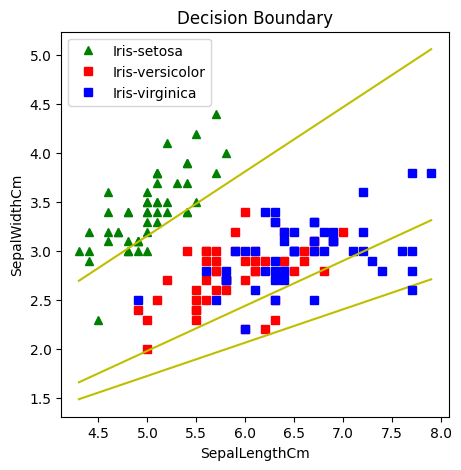

Accuracy =  0.7688888888888888 



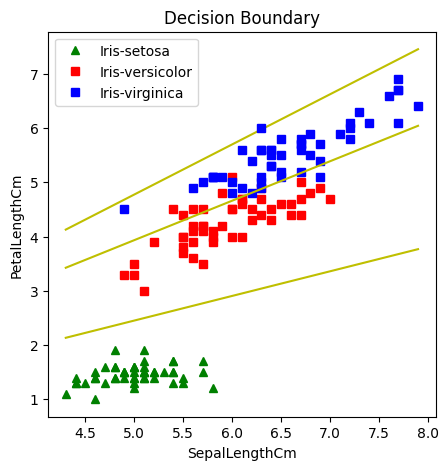

Accuracy =  0.8666666666666667 



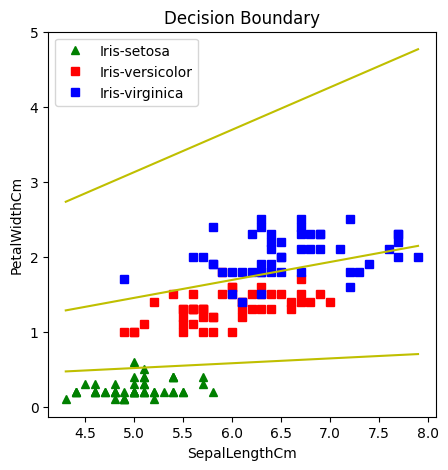

Accuracy =  0.86 



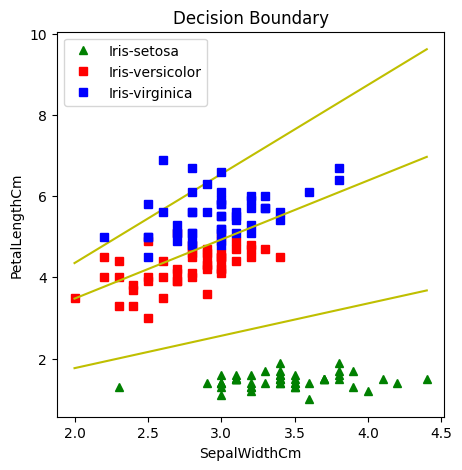

Accuracy =  0.8444444444444444 



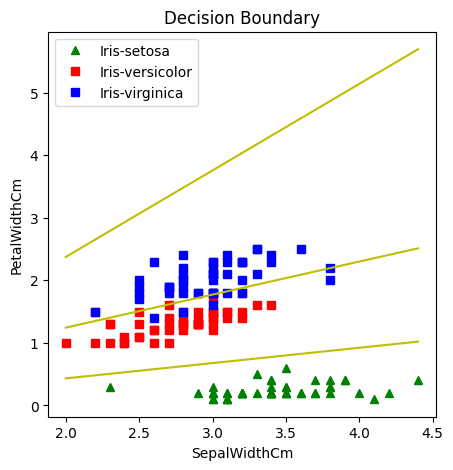

Accuracy =  0.8733333333333334 



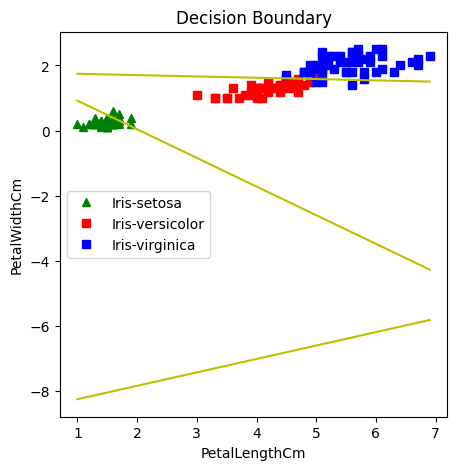

Accuracy =  0.86 



In [19]:
df = dst
features = [['SepalLengthCm','SepalWidthCm'], ['SepalLengthCm', 'PetalLengthCm'], ['SepalLengthCm', 'PetalWidthCm'], ['SepalWidthCm', 'PetalLengthCm'], ['SepalWidthCm', 'PetalWidthCm'], ['PetalLengthCm', 'PetalWidthCm']]
for feature in features:
    X=df[:][feature]
    Y=df[:]['Species']
    Y=Y.to_numpy()
    X=X.to_numpy()
    y=[[0 if 'Iris-setosa' in i else 1 for i in Y], [0 if 'Iris-versicolor' in i else 1 for i in Y],[0 if 'Iris-virginica' in i else 1 for i in Y]]
    y=np.array(y)
    w, b = train(X, y, bs=150, iter=1000, lr=0.01)
    final_accuracy = 0
    for i in range(len(y)):
        final_accuracy += accuracy(y[i], predict(X, w[i], b[i]))
    final_accuracy /= len(y)
    plot_separating_surface(X, y, w, b, feature)
    print("Accuracy = ", final_accuracy, "\n")

Observation:

*   From the graphs above, it is clear that separating the flowers on the basis of Petal Width and Sepal Width gives the best accuracy (0.873)

 Coclusion: I was able to point out performances of scikitlearn models with changing test-ratio.

 I also Implemented the Logistic Regression Classifier with best strategy to classify. It showed 87% of optimum accuracy.